In [2]:
# Import packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [3]:
# Read input file
df = pd.read_csv(r"C:/Deloy ML/weather.csv")
df

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,Month
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,1
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,1
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,1
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,1
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,1
...,...,...,...,...,...,...,...,...,...,...
181955,Soc Trang,28,23,8,SSW,0.0,75,50,1011,12
181956,Soc Trang,30,24,21,ENE,7.2,81,50,1011,12
181957,Soc Trang,26,24,9,ENE,1.3,91,75,1009,12
181958,Soc Trang,30,23,11,E,0.0,74,6,1012,12


In [4]:
# Encode province and win_d column data
encoder = LabelEncoder()
df['province'] = encoder.fit_transform(df['province'])
df['wind_d'] = encoder.fit_transform(df['wind_d'])

In [5]:
# Convert rain column data to binary
df['rain'] = df['rain'].apply(lambda x: 1 if float(x) > 0 else x)
df

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,Month
0,0,27,22,17,5,1.0,90,71,1010,1
1,0,31,25,20,1,0.0,64,24,1010,1
2,0,29,24,14,0,0.0,75,45,1008,1
3,0,30,24,30,0,0.0,79,52,1012,1
4,0,31,25,20,1,0.0,70,24,1010,1
...,...,...,...,...,...,...,...,...,...,...
181955,27,28,23,8,11,0.0,75,50,1011,12
181956,27,30,24,21,1,1.0,81,50,1011,12
181957,27,26,24,9,1,1.0,91,75,1009,12
181958,27,30,23,11,0,0.0,74,6,1012,12


In [6]:
# Seperate features and labels
X = df.drop("rain", axis=1)
y = df["rain"]

<AxesSubplot:>

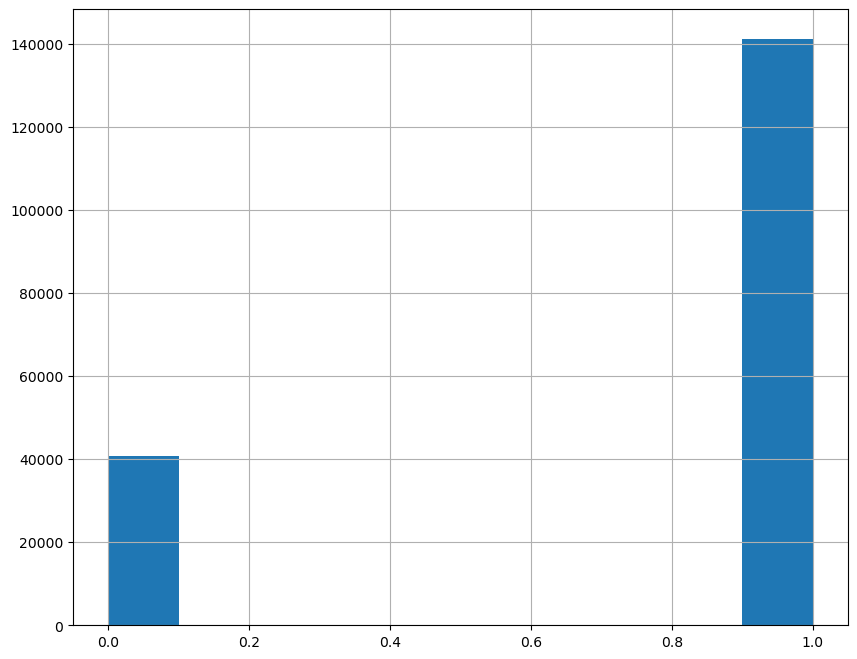

In [7]:
# Plot rain data
df["rain"].hist(figsize=(10,8))

In [8]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid', kernel_regularizer=l1(0.01))
])

In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Define callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [12]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100
4549/4549 [==============================] - 11s 2ms/step - loss: 0.3024 - accuracy: 0.8777 - val_loss: 0.2821 - val_accuracy: 0.8837
Epoch 2/100
4549/4549 [==============================] - 10s 2ms/step - loss: 0.2806 - accuracy: 0.8836 - val_loss: 0.2732 - val_accuracy: 0.8867
Epoch 3/100
4549/4549 [==============================] - 12s 3ms/step - loss: 0.2740 - accuracy: 0.8870 - val_loss: 0.2928 - val_accuracy: 0.8790
Epoch 4/100
4549/4549 [==============================] - 11s 2ms/step - loss: 0.2710 - accuracy: 0.8874 - val_loss: 0.2744 - val_accuracy: 0.8870
Epoch 5/100
4549/4549 [==============================] - 11s 2ms/step - loss: 0.2690 - accuracy: 0.8886 - val_loss: 0.2622 - val_accuracy: 0.8905
Epoch 6/100
4549/4549 [==============================] - 10s 2ms/step - loss: 0.2676 - accuracy: 0.8884 - val_loss: 0.2616 - val_accuracy: 0.8903
Epoch 7/100
4549/4549 [==============================] - 11s 2ms/step - loss: 0.2658 - accuracy: 0.8897 - val_loss: 0.2614 -

In [13]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1138/1138 [==============================] - 1s 1ms/step - loss: 0.2557 - accuracy: 0.8919
Test Loss: 0.2557259798049927
Test Accuracy: 0.8919268250465393
